In [ ]:
! apt-get install -y g++ openjdk-8-jdk python3-dev curl git build-essential
! pip install konlpy "tweepy<4.0.0"
! /bin/bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
curl is already the newest version (7.58.0-2ubuntu3.16).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
git is already the newest version (1:2.17.1-1ubuntu0.9).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  f

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,335 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
!pip install nltk

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/cjh/nmt/project3_nmt/data/train.csv')
df_train

,sid,en,ko
0,train-0,Just use a LinearLayout instead.,그 대신 Linear Layout을 쓰는 게 낫다.
1,train-1,I made a seventy-eight today.,저는 오늘 78타를 쳤습니다.
2,train-2,I thought the concert was boring.,나는 그 연주회가 지루하다고 생각했어요.
3,train-3,You can buy ramen at any store that deals with...,라면은 식료품을 취급하는 어느 상점에서나 구할 수 있습니다.
4,train-4,I prayed that you're not sick.,네가 아픈 게 아니길 기도를 했습니다.
...,...,...,...
149995,train-149995,Please tell me again the address you're going to.,가시는 곳 주소를 다시 알려주십시오.
149996,train-149996,What were the fundamental questions you tried ...,당신이 우리의 관계 안에서 해결하려 한 근본 질문들은 무엇이었는가?
149997,train-149997,A young child should not do ballet and at the ...,어린아이가 발레를 하면서 과도한 근육운동과 움직임을 해서는 안 됩니다.
149998,train-149998,You cannot describe how great the feelings are...,활을 쏘고 중앙에 맞추는 기분은 말로 표현할 수 없지요.


In [ ]:
df_dev = pd.read_csv('/content/drive/MyDrive/cjh/nmt/project3_nmt/data/dev.csv')
df_dev

,sid,en,ko
0,dev-0,Match up with Hello Carbot Megabold versus Met...,헬로카봇 메가볼들 대 매트론 K 컵스와의 대결이에요.
1,dev-1,Mr.Park sends his regards.,미스터 박이 대신 안부 전해 달라더군요.
2,dev-2,I wrote a story to become an editor.,저는 편집자가 되기 위해 이야기를 썼습니다.
3,dev-3,That's not what I'm thinking.,그것은 내가 생각한 것이 아닙니다.
4,dev-4,Who will you give the food?,당신은 그 음식을 누구에게 줄 것입니까?
...,...,...,...
9995,dev-9995,"As to GV and event schedule, you can participa...",GV 및 행사 일정은 모두 참석 가능합니다.
9996,dev-9996,What do you think the secret to this show's lo...,이 프로그램의 장수 비결은 뭐라고 생각하세요?
9997,dev-9997,I expressed the M-shaped form that flows in th...,진주 남강의 물의 흐름을 본뜬 M자 형태의 평면 형태 그리고 그 M자 형태의 천장에...
9998,dev-9998,"At that point, I realized that the police woul...","그때, 난 경찰이 아무 도움을 줄 수 없다는 걸 깨달았죠."


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/cjh/nmt/project3_nmt/data/test.csv')
df_test_2 =  pd.read_csv('/content/drive/MyDrive/cjh/nmt/project3_nmt/data/test2.csv')

df_test

,sid,en
0,test-0,I hope nothing happens to you.
1,test-1,"He'll adapt well, don't worry."
2,test-2,Another major risk of genetically modified foo...
3,test-3,That's not the point.
4,test-4,Margin status was defined as either a positive...
...,...,...
9995,test-9995,Let's make special memories.
9996,test-9996,Is there any top player in the world ranking?
9997,test-9997,The title of the second series of this show is...
9998,test-9998,The product is a gray melange fabric with a gr...


In [ ]:
df_test_2

,sid,en
0,test2-0,They were chosen as the chief husband and the ...
1,test2-1,So I stopped the process of preparing my under...
2,test2-2,"Accordingly, the food boiled down in soy sauce..."
3,test2-3,"According to statistics, office workers only u..."
4,test2-4,It's the impact of a group art therapy using c...
...,...,...
9995,test2-9995,So you just need to get on the bus with an eas...
9996,test2-9996,The Pyeongchang Olympics held by South Korea 3...
9997,test2-9997,"Hello, this is Ki Tae who is checking in Angsa..."
9998,test2-9998,Cotton thread is manufactured in order of remo...


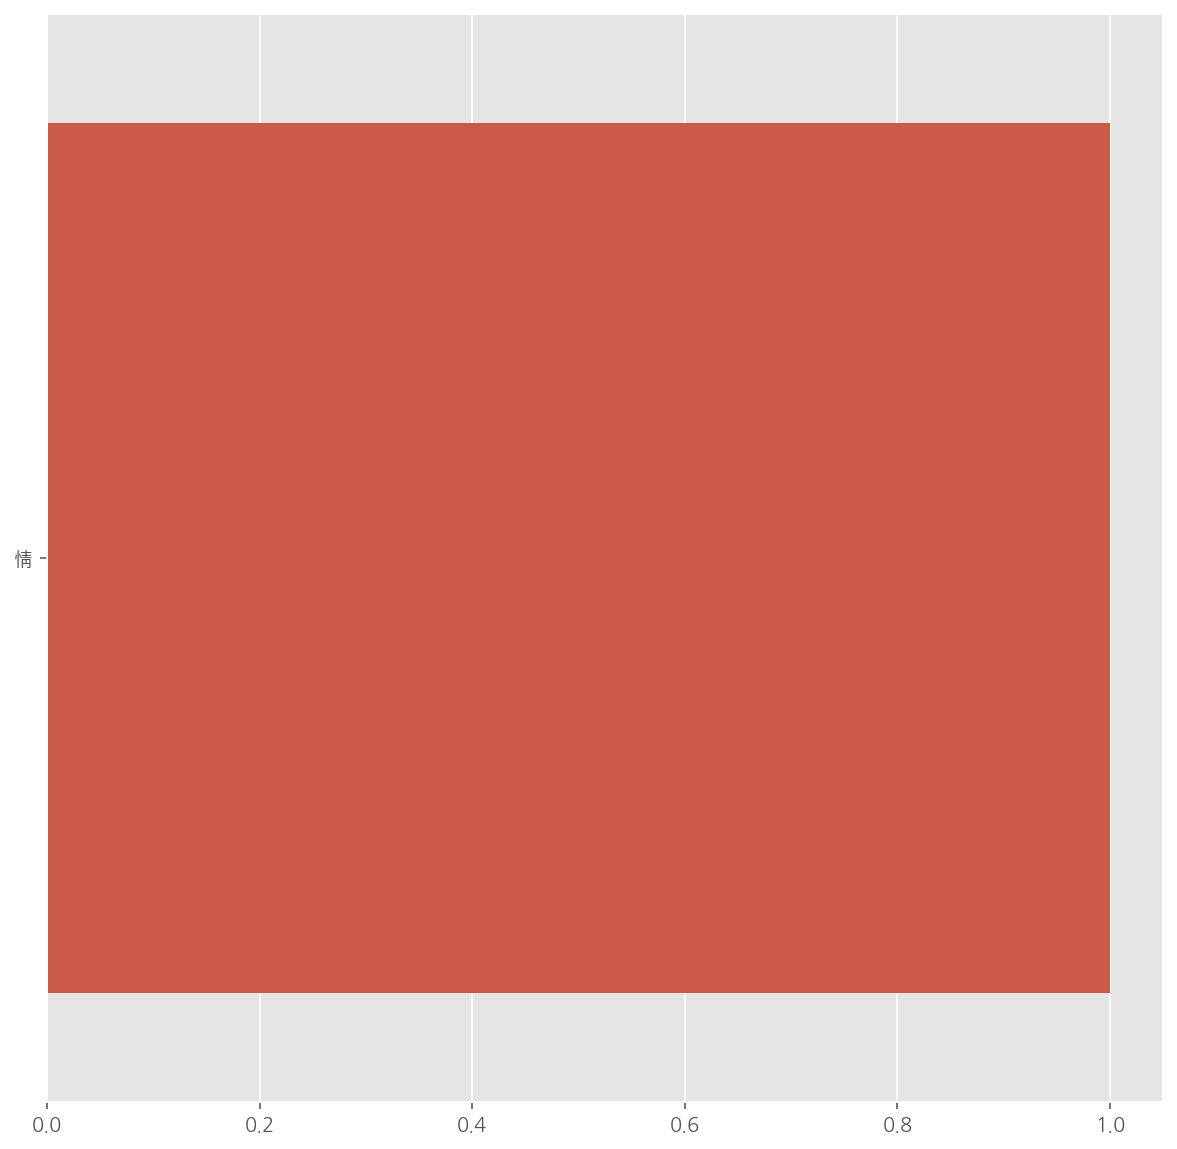

In [ ]:
import nltk
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.tag import Mecab
import collections 
import seaborn as sns 
import matplotlib.pyplot as plt 

m = konlpy.tag.Mecab()
sentence = df_train['en'].to_list() 
n_corpus = [] 
for t in sentence: 
  n_corpus += m.nouns(t) #mecab에서 명사 추출 
count = collections.Counter(n_corpus) 
most = count.most_common() #빈도 수 순으로 추출 
x, y= [], [] 
for word,count in most[:40]: 
  x.append(word) 
  y.append(count) 
  
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10)) 
sns.barplot(x=y,y=x)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[Text(0, 0.5, '형태소'), Text(0.5, 0, '빈도 수')]

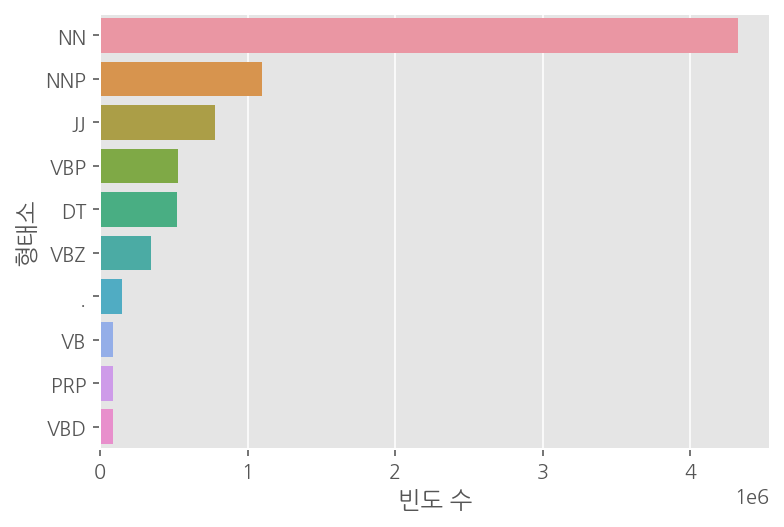

In [ ]:
nltk.download('averaged_perceptron_tagger')
tags = []
for t in sentence:
  temp = nltk.tag.pos_tag(t)
  for p in temp:
    tags.append(p[1])
    
counter=collections.Counter(tags)
x,y=list(map(list,zip(*counter.most_common(10))))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = '빈도 수', ylabel = '형태소')

[Text(0, 0.5, '형태소'), Text(0.5, 0, '빈도 수')]

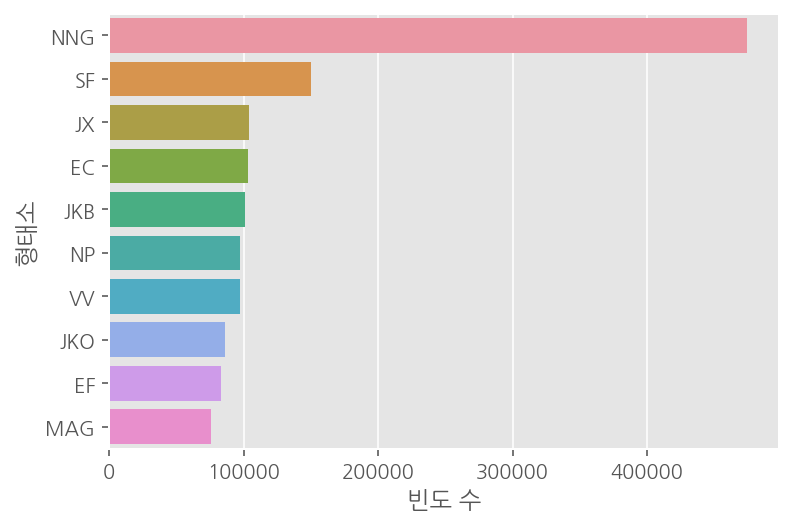

In [ ]:
sentence_k = df_train['ko'].to_list()

tags_k = []
for t in sentence_k:
  temp = m.pos(t)
  for p in temp:
    tags_k.append(p[1])
    
counter=collections.Counter(tags_k)
x,y=list(map(list,zip(*counter.most_common(10))))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = '빈도 수', ylabel = '형태소')

# en

NN: 일반명사

NNP: 고유명사

JJ: 형용사

VBP: 현재형동사  

DT: 관형사

# ko

NNG: 일반 명사

SF: 마침표,물음표,느낌표

JX: 보조사

EC: 연결 어미  

JKB: 부사격 조사

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
m_corpus = [] 
for t in sentence: 
  m_corpus.append(' '.join(m.morphs(t)))


def get_top_ngram(corpus, n=None):
  vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:20]

[Text(0, 0.5, '2gram 어절'), Text(0.5, 0, '빈도 수')]

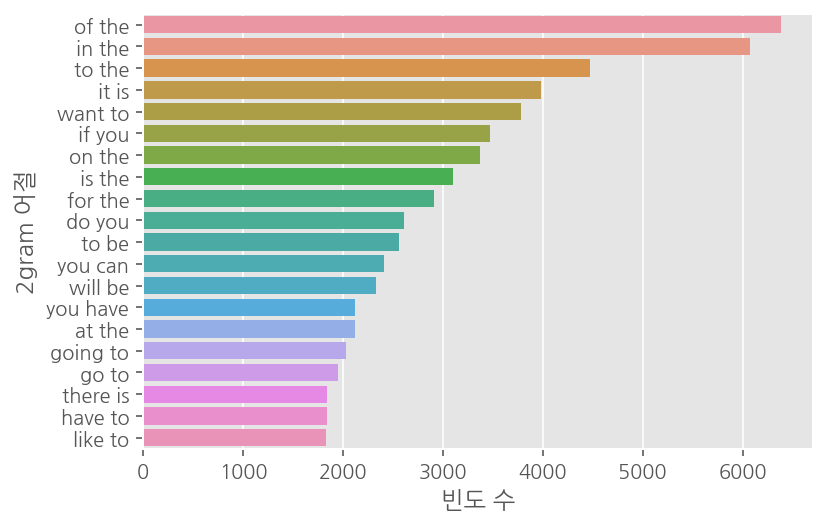

In [ ]:
top_n_bigrams=get_top_ngram(m_corpus,2)[:20]
x,y=map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = '빈도 수', ylabel = '2gram 어절')


In [ ]:
m_corpus_k = [] 
for t in sentence_k: 
  m_corpus_k.append(' '.join(m.morphs(t)))

[Text(0, 0.5, '2gram 어절'), Text(0.5, 0, '빈도 수')]

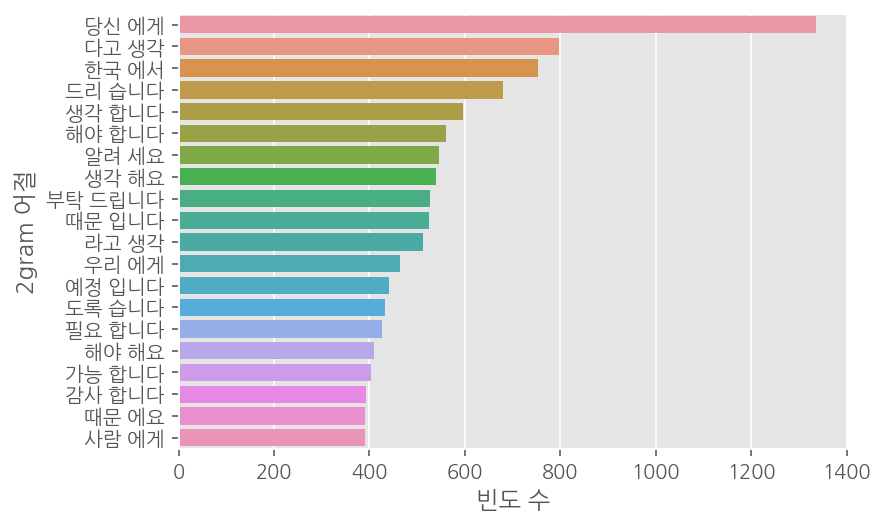

In [ ]:
top_n_bigrams=get_top_ngram(m_corpus_k,2)[:20]
x,y=map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = '빈도 수', ylabel = '2gram 어절')

In [ ]:
# 영어
reviews_e = list(df_train['en'])
tokenized_reviews_e = [r.split() for r in reviews_e]
review_len_by_token_e = [len(t) for t in tokenized_reviews_e]
review_len_by_eumjeol_e = [len(s.replace(' ', '')) for s in reviews_e]

Text(0, 0.5, 'number of sentences')

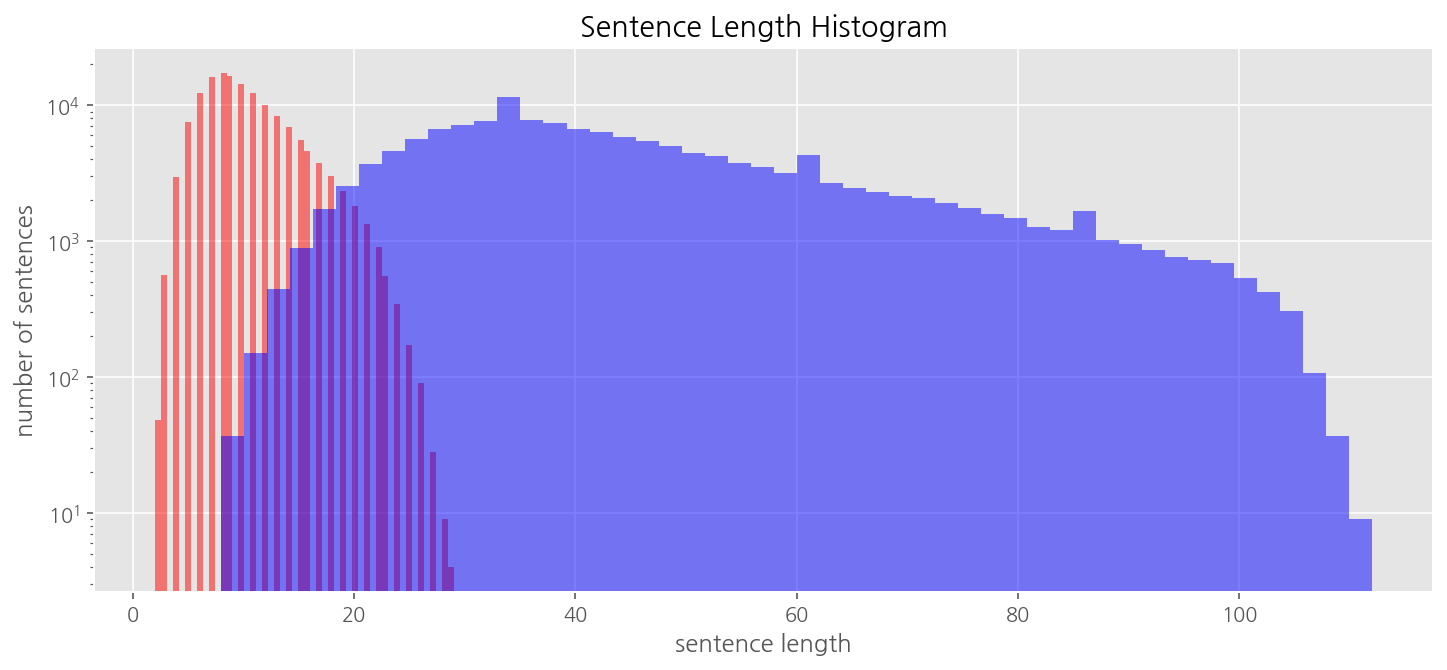

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))

plt.hist(review_len_by_token_e, bins = 50, alpha=0.5, color="r", label="word")
plt.hist(review_len_by_eumjeol_e, bins = 50, alpha=0.5, color="b", label="aplt.yscallphabet")

plt.yscale('log', nonposy = 'clip')
plt.title('Sentence Length Histogram')
plt.xlabel('sentence length')
plt.ylabel('number of sentences')

In [ ]:
import numpy as np
# 단어갯수기반
print('단어 갯수 기반')
print('문장 최대 길이 : {}'.format(np.max(review_len_by_token_e)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_token_e)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_token_e)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_token_e)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_token_e)))
print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_token_e, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_token_e, 75)))
print()
# 알파벳 갯수 기반
print('알파벳 갯수 기반')
print('문장 최대 길이 : {}'.format(np.max(review_len_by_eumjeol_e)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_eumjeol_e)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_eumjeol_e)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_eumjeol_e)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_eumjeol_e)))
print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_eumjeol_e, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_eumjeol_e, 75)))

단어 갯수 기반
문장 최대 길이 : 29
문장 최소 길이 : 2
문장 평균 길이 : 10.43
문장 길이 표준편차 : 4.12
문장 중간 길이 : 10.0
제 1사분위 길이 : 7.0
제 3사분위 길이 : 13.0

알파벳 갯수 기반
문장 최대 길이 : 112
문장 최소 길이 : 8
문장 평균 길이 : 45.99
문장 길이 표준편차 : 19.37
문장 중간 길이 : 42.0
제 1사분위 길이 : 31.0
제 3사분위 길이 : 57.0


In [ ]:
# 한국어
reviews_k = list(df_train['ko'])
tokenized_reviews_k = [r.split() for r in reviews_k]
review_len_by_token_k = [len(t) for t in tokenized_reviews_k]
review_len_by_eumjeol_k = [len(s.replace(' ', '')) for s in reviews_k]

Text(0, 0.5, 'number of sentences')

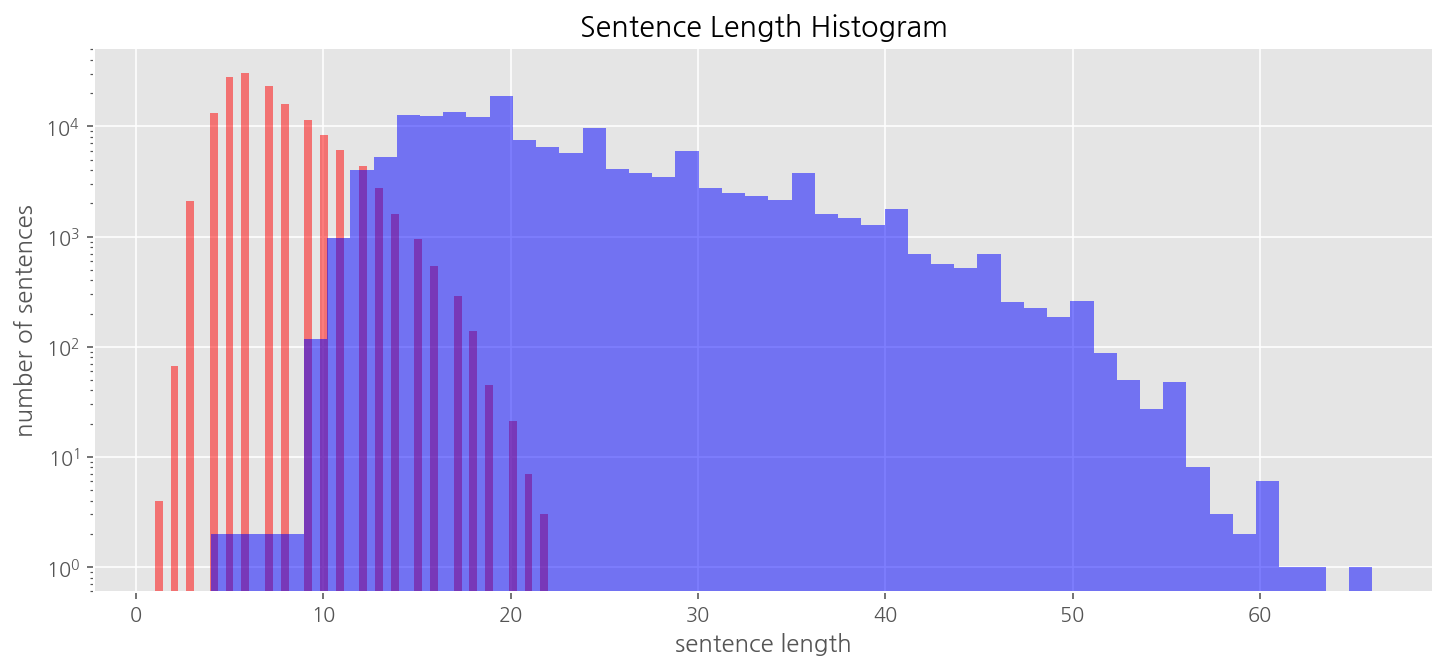

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))

plt.hist(review_len_by_token_k, bins = 50, alpha=0.5, color="r", label="word")
plt.hist(review_len_by_eumjeol_k, bins = 50, alpha=0.5, color="b", label="aplt.yscallphabet")

plt.yscale('log', nonposy = 'clip')
plt.title('Sentence Length Histogram')
plt.xlabel('sentence length')
plt.ylabel('number of sentences')

In [ ]:
# 단어갯수기반
print('단어 갯수 기반')
print('문장 최대 길이 : {}'.format(np.max(review_len_by_token_k)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_token_k)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_token_k)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_token_k)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_token_k)))
print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_token_k, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_token_k, 75)))
print()
# 알파벳 갯수 기반
print('알파벳 갯수 기반')
print('문장 최대 길이 : {}'.format(np.max(review_len_by_eumjeol_k)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_eumjeol_k)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_eumjeol_k)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_eumjeol_k)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_eumjeol_k)))
print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_eumjeol_k, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_eumjeol_k, 75)))

단어 갯수 기반
문장 최대 길이 : 22
문장 최소 길이 : 1
문장 평균 길이 : 7.14
문장 길이 표준편차 : 2.56
문장 중간 길이 : 7.0
제 1사분위 길이 : 5.0
제 3사분위 길이 : 8.0

알파벳 갯수 기반
문장 최대 길이 : 66
문장 최소 길이 : 4
문장 평균 길이 : 22.20
문장 길이 표준편차 : 7.73
문장 중간 길이 : 20.0
제 1사분위 길이 : 17.0
제 3사분위 길이 : 26.0


In [ ]:
# test
reviews_t = list(df_test['en'])
tokenized_reviews_t = [r.split() for r in reviews_t]
review_len_by_token_t = [len(t) for t in tokenized_reviews_t]
review_len_by_eumjeol_t = [len(s.replace(' ', '')) for s in reviews_t]

Text(0, 0.5, 'number of sentences')

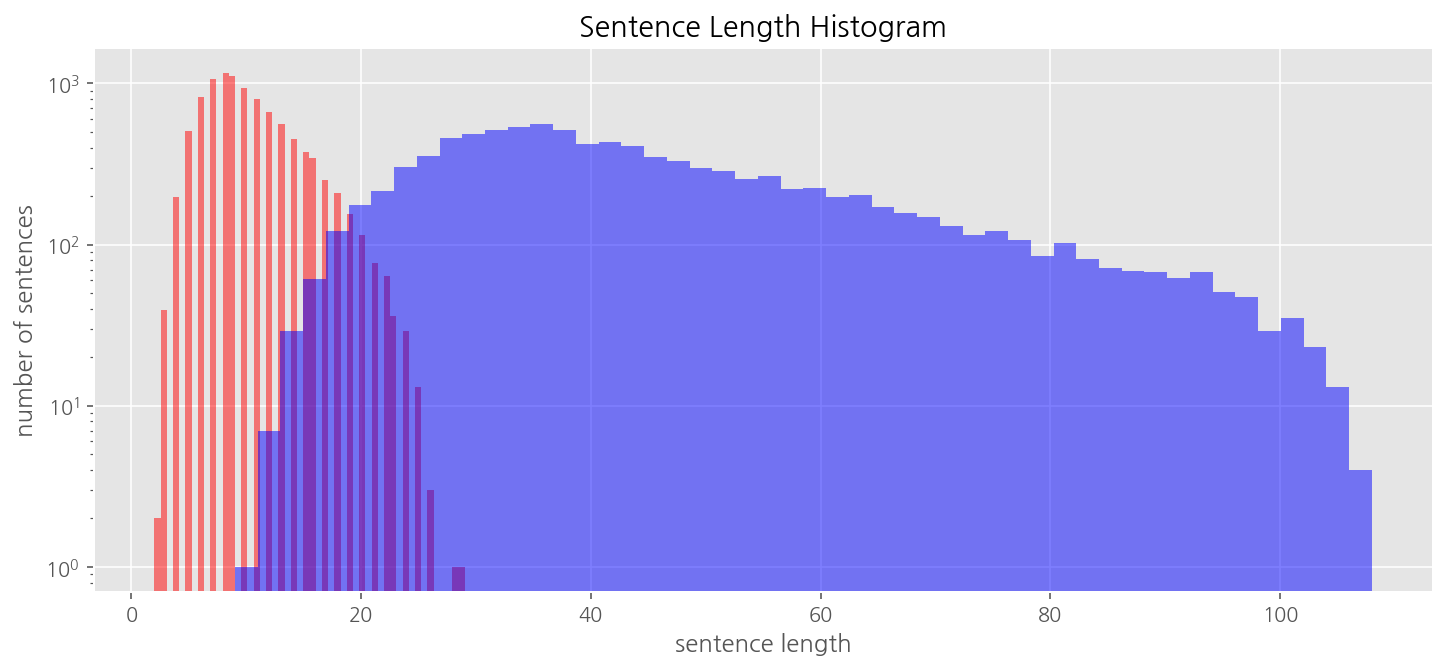

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))

plt.hist(review_len_by_token_t, bins = 50, alpha=0.5, color="r", label="word")
plt.hist(review_len_by_eumjeol_t, bins = 50, alpha=0.5, color="b", label="aplt.yscallphabet")

plt.yscale('log', nonposy = 'clip')
plt.title('Sentence Length Histogram')
plt.xlabel('sentence length')
plt.ylabel('number of sentences')

In [ ]:
# 단어갯수기반
print('단어 갯수 기반')
print('문장 최대 길이 : {}'.format(np.max(review_len_by_token_t)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_token_t)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_token_t)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_token_t)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_token_t)))
print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_token_t, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_token_t, 75)))
print()
# 알파벳 갯수 기반
print('알파벳 갯수 기반')
print('문장 최대 길이 : {}'.format(np.max(review_len_by_eumjeol_t)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_eumjeol_t)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_eumjeol_t)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_eumjeol_t)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_eumjeol_t)))
print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_eumjeol_t, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_eumjeol_t, 75)))

단어 갯수 기반
문장 최대 길이 : 29
문장 최소 길이 : 2
문장 평균 길이 : 10.43
문장 길이 표준편차 : 4.13
문장 중간 길이 : 10.0
제 1사분위 길이 : 7.0
제 3사분위 길이 : 13.0

알파벳 갯수 기반
문장 최대 길이 : 108
문장 최소 길이 : 9
문장 평균 길이 : 46.08
문장 길이 표준편차 : 19.36
문장 중간 길이 : 42.0
제 1사분위 길이 : 32.0
제 3사분위 길이 : 57.0


In [ ]:
# test2
reviews_t2 = list(df_test_2['en'])
tokenized_reviews_t2 = [r.split() for r in reviews_t2]
review_len_by_token_t2 = [len(t) for t in tokenized_reviews_t2]
review_len_by_eumjeol_t2 = [len(s.replace(' ', '')) for s in reviews_t2]

Text(0, 0.5, 'number of sentences')

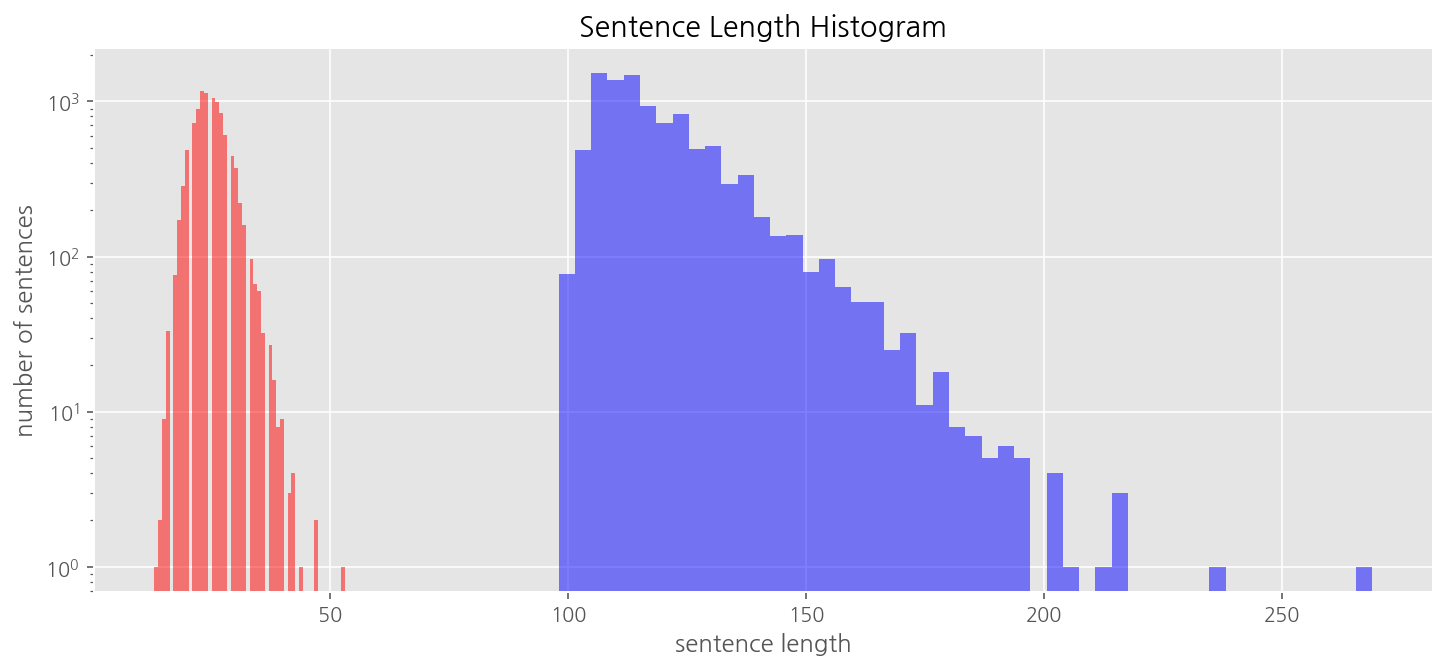

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))

plt.hist(review_len_by_token_t2, bins = 50, alpha=0.5, color="r", label="word")
plt.hist(review_len_by_eumjeol_t2, bins = 50, alpha=0.5, color="b", label="aplt.yscallphabet")

plt.yscale('log', nonposy = 'clip')
plt.title('Sentence Length Histogram')
plt.xlabel('sentence length')
plt.ylabel('number of sentences')

In [ ]:
# 단어갯수기반
print('단어 갯수 기반')
print('문장 최대 길이 : {}'.format(np.max(review_len_by_token_t2)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_token_t2)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_token_t2)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_token_t2)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_token_t2)))
print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_token_t2, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_token_t2, 75)))
print()
# 알파벳 갯수 기반
print('알파벳 갯수 기반')
print('문장 최대 길이 : {}'.format(np.max(review_len_by_eumjeol_t2)))
print('문장 최소 길이 : {}'.format(np.min(review_len_by_eumjeol_t2)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(review_len_by_eumjeol_t2)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(review_len_by_eumjeol_t2)))
print('문장 중간 길이 : {}'.format(np.median(review_len_by_eumjeol_t2)))
print('제 1사분위 길이 : {}'.format(np.percentile(review_len_by_eumjeol_t2, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(review_len_by_eumjeol_t2, 75)))

단어 갯수 기반
문장 최대 길이 : 53
문장 최소 길이 : 13
문장 평균 길이 : 24.85
문장 길이 표준편차 : 3.78
문장 중간 길이 : 25.0
제 1사분위 길이 : 22.0
제 3사분위 길이 : 27.0

알파벳 갯수 기반
문장 최대 길이 : 269
문장 최소 길이 : 98
문장 평균 길이 : 119.63
문장 길이 표준편차 : 14.56
문장 중간 길이 : 116.0
제 1사분위 길이 : 109.0
제 3사분위 길이 : 126.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   sid     150000 non-null  object
 1   en      150000 non-null  object
 2   ko      150000 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


In [ ]:
print('df_train의 총 질문 수 : {} 건'.format(len(np.unique(df_train))))

df_train의 총 질문 수 : 449893 건


In [ ]:
print('반복해서 나타나는 질문의 수 : {} 건'.format(np.sum(df_train.value_counts() > 1)))

반복해서 나타나는 질문의 수 : 0 건


In [ ]:
print('df_test의 총 질문 수 : {} 건'.format(len(np.unique(df_test))))
print('반복해서 나타나는 질문의 수 : {} 건'.format(np.sum(df_test.value_counts() > 1)))

df_test의 총 질문 수 : 20000 건
반복해서 나타나는 질문의 수 : 0 건


In [ ]:
print('df_test_2의 총 질문 수 : {} 건'.format(len(np.unique(df_test_2))))
print('반복해서 나타나는 질문의 수 : {} 건'.format(np.sum(df_test_2.value_counts() > 1)))

df_test_2의 총 질문 수 : 19999 건
반복해서 나타나는 질문의 수 : 0 건
